# Experimento 8: Acurácia do KNN padrão

- Validação usando todas as colunas e usando apenas os 6 melhores canais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
chb_df = pd.read_csv('./chb.csv')

MELHORES_6_CANAIS = ['2', '3', '6', '7', '10', '14']
melhores_colunas = [col for col in chb_df.columns if col.split('-')[-1] in MELHORES_6_CANAIS]

groups = chb_df.pop('chb')
y = chb_df.pop('target').values
X1 = chb_df.values
X2 = chb_df[melhores_colunas].values

       todos_os_canais  melhores_6_canais
count        24.000000          24.000000
mean          0.746387           0.746408
std           0.159432           0.161383
min           0.411765           0.382353
25%           0.600946           0.635440
50%           0.788791           0.780598
75%           0.882960           0.865037
max           0.949495           0.944444


todos_os_canais,melhores_6_canais
0.602941,0.591387
0.674725,0.613187
0.790000,0.760000
0.894545,0.878182
0.594961,0.552326
0.879098,0.860656
0.917431,0.915138
0.932870,0.905093
0.823671,0.903382
0.869898,0.852041


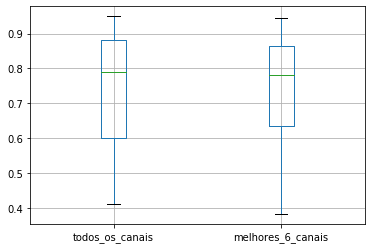

In [3]:
acc_list = []
for train_index, test_index in GroupKFold(n_splits=24).split(X1, y, groups):
    # Separando dados
    X1_train, X1_test = X1[train_index], X1[test_index]
    X2_train, X2_test = X2[train_index], X2[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc_1 = make_pipeline(StandardScaler(), KNeighborsClassifier())\
                .fit(X1_train, y_train)\
                    .score(X1_test, y_test)

    acc_2 = make_pipeline(StandardScaler(), KNeighborsClassifier())\
                .fit(X2_train, y_train)\
                    .score(X2_test, y_test)
    
    acc_list.append([acc_1, acc_2])


knn_df = pd.DataFrame(data=acc_list, columns=['todos_os_canais', 'melhores_6_canais'])
knn_df.to_csv('./01-knn.csv')

knn_df.boxplot()

print(knn_df.describe())

knn_df.style.hide_index().background_gradient(cmap='Blues')